# TP 1 - Parte 2

In [86]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.datasets import load_iris
import xgboost as xgb
from yellowbrick.classifier import ConfusionMatrix
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor


In [87]:
data = pd.read_csv('../data/loan_data.csv')
data

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


# Procesamiento

In [88]:
#1. Datos con los cambios realizados en la primera parte
data = data[data['person_age'] <= 39]
data = data[data['person_income'] <= 168653]
data = data[data['person_emp_exp'] <= 18]
data = data[data['loan_amnt'] <= 23050]
data = data[data['loan_percent_income'] <= 0.37]
data = data[data['cb_person_cred_hist_length'] <= 15]
data = data[(data['credit_score'] >= 503) & (data['credit_score'] <= 773)]
data

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
5,21.0,female,High School,12951.0,0,OWN,2500.0,VENTURE,7.14,0.19,2.0,532,No,1
9,21.0,female,High School,12739.0,0,OWN,1600.0,VENTURE,14.74,0.13,3.0,640,No,1
11,21.0,female,Associate,13113.0,0,OWN,4500.0,HOMEIMPROVEMENT,8.63,0.34,2.0,651,No,1
19,24.0,female,Master,14283.0,1,MORTGAGE,1750.0,EDUCATION,10.99,0.12,2.0,679,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


In [89]:
#2. para las variables continuas mostramos un listado de Q1 y Q3. Determinamos si hay escalas muy dispares entre las variables
continuas_cols = ["person_income", "loan_amnt", "loan_int_rate", "loan_percent_income"]
data_continuas = data[continuas_cols].quantile([0.25, 0.75]).transpose()
data_continuas.columns = ["Q1", "Q3"]
data_continuas 

,Q1,Q3
person_income,45616.00,87819.50
loan_amnt,4889.50,12000.00
loan_int_rate,8.49,12.98
loan_percent_income,0.07,0.18


Hay **escalas muy dispares** entre las variables.

In [90]:
#3. Determinamos si loan_status es una variable balanceada o desbalanceada
loan_status_counts = data['loan_status'].value_counts()
loan_status_percentages = data['loan_status'].value_counts(normalize=True) * 100
loan_status_summary = pd.DataFrame({'Count': loan_status_counts, 'Percentage': loan_status_percentages.round(2)}).reset_index()
loan_status_summary

,loan_status,Count,Percentage
0,0,29489,78.59
1,1,8034,21.41


La variable **loan_status** está desbalanceada, ya que:
- La clase 0 representa el 77.78% de las observaciones.
- La clase 1 representa solo el 22.22%.

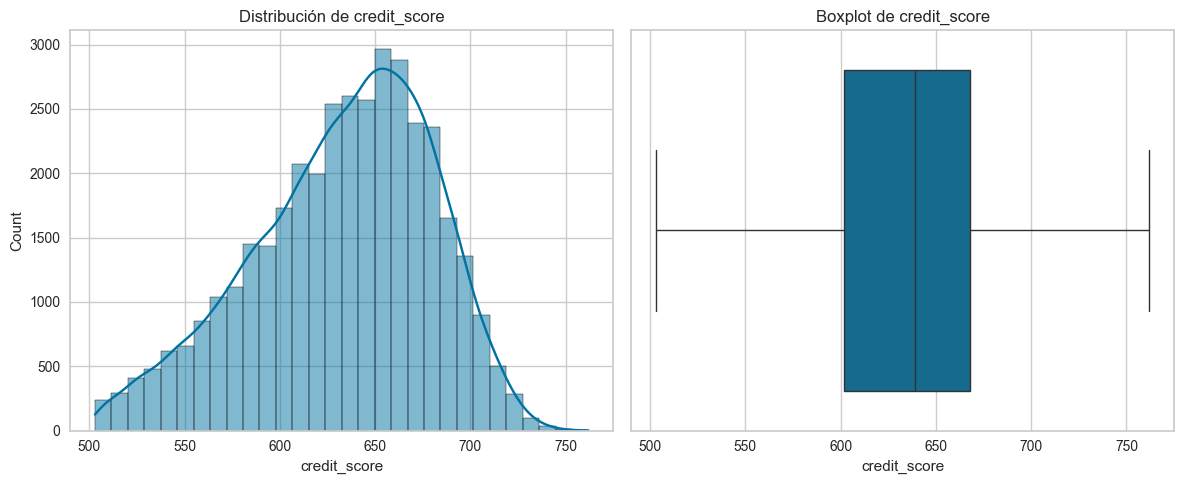

In [91]:
#4. Determinamos si credit_score tiene valores anómalos o muchos valores extremos. En tal caso de ser muchos, vamos a eliminarlos.
plt.figure(figsize=(12, 5))

# Histograma
plt.subplot(1, 2, 1)
sns.histplot(data['credit_score'], bins=30, kde=True)
plt.title("Distribución de credit_score")

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=data['credit_score'])
plt.title("Boxplot de credit_score")

plt.tight_layout()
plt.show()

In [92]:
Q1 = data['credit_score'].quantile(0.25)
Q3 = data['credit_score'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = data[(data['credit_score'] < lower_bound) | (data['credit_score'] > upper_bound)]
percentage_outliers = (len(outliers) / len(data)) * 100

print(f"Cantidad de valores extremos: {len(outliers)}")
print(f"Porcentaje de outliers: {percentage_outliers:.2f}%")

Cantidad de valores extremos: 0
Porcentaje de outliers: 0.00%


No se detectaron valores extremos.  
Esto se debe a que previamente, durante la etapa de limpieza, ya se filtraron los valores fuera del rango [503, 773].  
Por lo tanto, no fue necesario eliminar observaciones adicionales en este paso.

In [93]:
#5. Separamos el dataset en componentes:
#a.Separamos la columna de loan_status y la llamamos y1.
y1 = data['loan_status']
#b.Separamos la columna de credit_score y la llamamos y2.
y2 = data['credit_score']
#c.Separamos todas las columnas que no sean loan_status y credit_score y las llamamos X.
X = data.drop(columns=['loan_status', 'credit_score'])
X

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,previous_loan_defaults_on_file
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,Yes
5,21.0,female,High School,12951.0,0,OWN,2500.0,VENTURE,7.14,0.19,2.0,No
9,21.0,female,High School,12739.0,0,OWN,1600.0,VENTURE,14.74,0.13,3.0,No
11,21.0,female,Associate,13113.0,0,OWN,4500.0,HOMEIMPROVEMENT,8.63,0.34,2.0,No
19,24.0,female,Master,14283.0,1,MORTGAGE,1750.0,EDUCATION,10.99,0.12,2.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,No
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,No
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,No
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,No


# Aprendizaje no supervisado


## Clustering

In [94]:
#1. Entrenamos un modelo de KMeans sobre X.
#a. Calculamos el estadístico de Hopkins para determinar si la clusterización está justificada.
def Hopkins(X, m=None, random_state=0):
    """
    Hopkins en [0,1]; ~0.5 aleatorio/uniforme, ->1 fuerte clusterización.
    """
    rng = np.random.default_rng(random_state)
    X = np.asarray(X)
    n, d = X.shape
    if n < 2:
        raise ValueError("Need at least 2 samples")
    if m is None:
        m = max(1, int(0.1 * n))
    m = min(m, n-1)  # por w_i (excluir el propio punto)

    # Escalamos a [0,1]^d para definir el dominio uniforme
    from sklearn.preprocessing import MinMaxScaler
    Xs = MinMaxScaler().fit_transform(X)

    # Vecinos sobre datos reales
    nbrs = NearestNeighbors(n_neighbors=2).fit(Xs)

    # u_i: puntos uniformes en [0,1]^d
    U = rng.uniform(0.0, 1.0, size=(m, d))
    u = nbrs.kneighbors(U, n_neighbors=1, return_distance=True)[0].ravel()

    # w_i: puntos reales
    idx = rng.choice(n, size=m, replace=False)
    w = nbrs.kneighbors(Xs[idx], n_neighbors=2, return_distance=True)[0][:, 1]

    return float(u.sum() / (u.sum() + w.sum()))

# Usamos solo las columnas numéricas
X_num = X.select_dtypes(include='number')

# Escalamos a [0,1] para usar Hopkins
scaler = MinMaxScaler()
X_minmax = scaler.fit_transform(X_num)

# Calcular Hopkins
hopkins_score = Hopkins(X_minmax, random_state=42)
print(f"Hopkins score: {hopkins_score:.4f}")

Hopkins score: 0.8343


Con un valor de **0.83**, los datos presentan tendencia al agrupamiento, lo que justifica aplicar un algoritmo de clustering como KMeans.


In [95]:
#b. Decidimos si conviene normalizar las variables de entrada.
columns = ["person_income", "loan_amnt", "loan_percent_income", "loan_int_rate"]
data[columns].agg(["min", "max"])

,person_income,loan_amnt,loan_percent_income,loan_int_rate
min,8000.0,500.0,0.01,5.42
max,168633.0,23000.0,0.37,20.00


Las variables presentan escalas muy diferentes. Por este motivo, conviene normalizar antes de aplicar KMeans, para que todas las variables tengan el mismo peso en el cálculo de distancias.

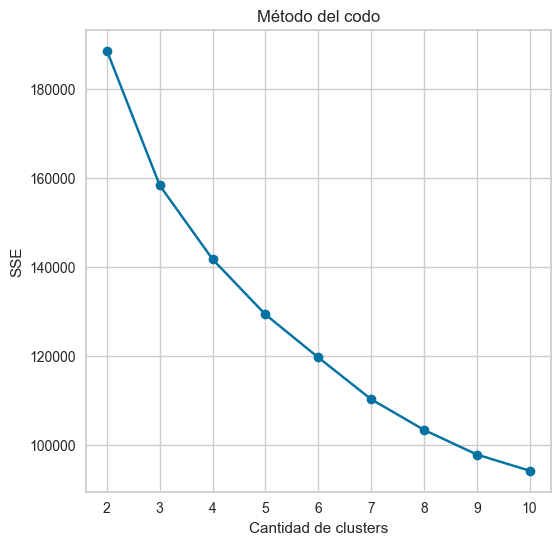

In [96]:
#c. Hallamos la cantidad de clusters adecuada mediante inertia.
standar_scaler = StandardScaler()
X_scaled = standar_scaler.fit_transform(X_num)

sse = []
list_k = list(range(2, 11)) 

for k in list_k:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)  # variables numéricas normalizadas
    sse.append(km.inertia_)

plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel('Cantidad de clusters')
plt.ylabel('SSE')
plt.title('Método del codo')
plt.show()

En el gráfico del método del codo no se observa un quiebre muy marcado, pero la pendiente comienza a suavizarse a partir de k = 4.  
Por lo tanto, se considera que **k = 4** es la cantidad de clusters más adecuada para este dataset.

In [97]:
#d. Para la cantidad óptima analizar la calidad de los clusters con silhouette.
list_k = list(range(2, 7))
for n_clusters in list_k:
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    labels = clusterer.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    print(f"For n_clusters = {n_clusters}, silhouette score = {score:.4f}")

For n_clusters = 2, silhouette score = 0.2786
For n_clusters = 3, silhouette score = 0.2255
For n_clusters = 4, silhouette score = 0.2118
For n_clusters = 5, silhouette score = 0.2019
For n_clusters = 6, silhouette score = 0.1775


Se calculó el coeficiente de silhouette para distintos valores de clusters.  
El mayor valor se obtuvo en **k=2**, lo que indica que esta configuración logra la mejor separación entre los clusters y que los puntos dentro de cada grupo están más próximos entre sí.

In [98]:
#e. Almacenamos el cluster asignado para cada fila como features a usar para las tareas de aprendizaje supervisado.
k_optimo = 2
kmeans = KMeans(n_clusters=k_optimo, random_state=42)
labels = kmeans.fit_predict(X_scaled)
data["cluster"] = labels
data["cluster"].value_counts()

cluster
1    23684
0    13839
Name: count, dtype: int64

## Reducción de dimensiones

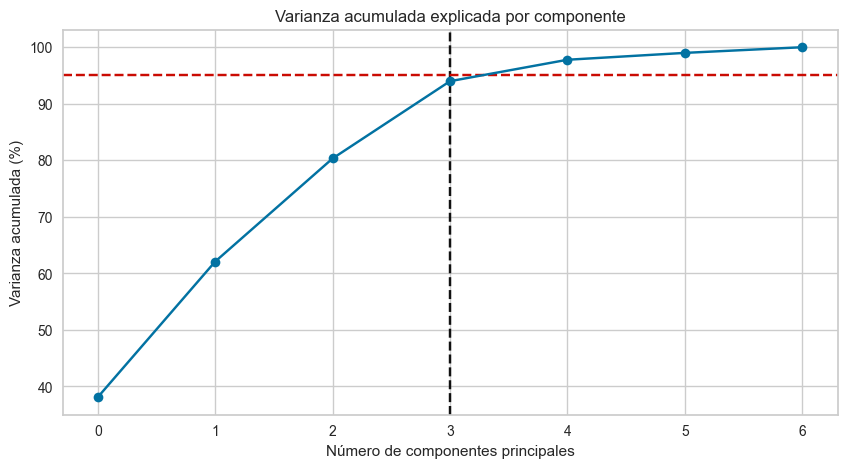

In [99]:
#2. Entrenamos un modelo con PCA sobre X. 
#a. Decidimos si conviene normalizar las variables de entrada.
pca = PCA()
pca.fit(X_scaled)

var_cumu = np.cumsum(pca.explained_variance_ratio_) * 100

k = 3
plt.figure(figsize=(10,5))
plt.title('Varianza acumulada explicada por componente')
plt.xlabel('Número de componentes principales')
plt.ylabel('Varianza acumulada (%)')
plt.axvline(x=k, color="k", linestyle="--")
plt.axhline(y=95, color="r", linestyle="--")
plt.plot(var_cumu, marker='o')
plt.show()

El gráfico de varianza acumulada muestra que con **3 componentes principales** se alcanza más del **95% de la varianza explicada**.  

Esto confirma que **sí conviene normalizar las variables de entrada antes de aplicar PCA**. De esta forma, se evita que las variables con mayor escala dominen el análisis y se logra una reducción de dimensiones representativa.

In [100]:
#b. Hallamos la cantidad de componentes adecuada.
pca_auto = PCA(n_components=0.95)
X_pca_auto = pca_auto.fit_transform(X_scaled)
print("Cantidad de componentes elegidos automáticamente:", pca_auto.n_components_)
print("Forma del dataset reducido:", X_pca_auto.shape)


Cantidad de componentes elegidos automáticamente: 5
Forma del dataset reducido: (37523, 5)


El número de componentes se puede decidir de dos formas:  
1. **Método gráfico**: al observar la curva de varianza acumulada, se aprecia que a partir de 3 componentes se alcanza aproximadamente el 95% de la varianza explicada.  
2. **Método automático**: utilizando `PCA(n_components=0.95)`, se obtuvo **5 componentes** como el número necesario para superar el 95% de varianza de forma exacta.

En conclusión, aunque visualmente podría elegirse k=3, el cálculo preciso indica que con **5 componentes principales** se garantiza retener al menos el 95% de la información del dataset.

In [101]:
#c. Informamos la cantidad de varianza acumulada explicada por las componentes seleccionadas.
explained_var = pca_auto.explained_variance_ratio_ * 100
cumulative_var = explained_var.cumsum()

print("Varianza explicada por cada componente (%):")
for i, var in enumerate(explained_var, start=1):
    print(f"Componente {i}: {var:.2f}%")

print(f"\nVarianza acumulada con {pca_auto.n_components_} componentes: {cumulative_var[-1]:.2f}%")

Varianza explicada por cada componente (%):
Componente 1: 38.08%
Componente 2: 24.00%
Componente 3: 18.24%
Componente 4: 13.67%
Componente 5: 3.79%

Varianza acumulada con 5 componentes: 97.78%


In [102]:
#d. Almacenamos las componentes como features a usar para las tareas de aprendizaje supervisado.
pca_final = PCA(n_components=pca_auto.n_components_)
X_pca = pca_final.fit_transform(X_scaled)
pca_columns = [f"PCA{i+1}" for i in range(pca_final.n_components_)]
X_pca_df = pd.DataFrame(X_pca, columns=pca_columns)
data_pca = pd.concat([data.reset_index(drop=True), X_pca_df], axis=1)
data_pca


,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status,cluster,PCA1,PCA2,PCA3,PCA4,PCA5
0,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0,1,-2.234413,-1.349012,-1.804767,0.075246,-0.039916
1,21.0,female,High School,12951.0,0,OWN,2500.0,VENTURE,7.14,0.19,2.0,532,No,1,1,-2.266783,-0.420069,-1.773341,-1.547422,-0.040961
2,21.0,female,High School,12739.0,0,OWN,1600.0,VENTURE,14.74,0.13,3.0,640,No,1,1,-2.039644,-0.546960,-2.145507,1.096363,0.228948
3,21.0,female,Associate,13113.0,0,OWN,4500.0,HOMEIMPROVEMENT,8.63,0.34,2.0,651,No,1,1,-2.289522,1.344117,-2.172737,-1.505154,-0.053495
4,24.0,female,Master,14283.0,1,MORTGAGE,1750.0,EDUCATION,10.99,0.12,2.0,679,No,1,1,-1.663640,-0.900047,-1.855790,-0.101046,-0.335061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37518,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1,1,-0.162890,2.910345,-0.851434,0.860090,-0.881325
37519,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1,0,4.379439,0.327884,-0.716993,0.858925,-0.638034
37520,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1,0,2.150388,-1.602324,-0.733325,-0.115390,0.634895
37521,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1,1,0.322802,2.818471,-1.590815,-0.125558,0.101579


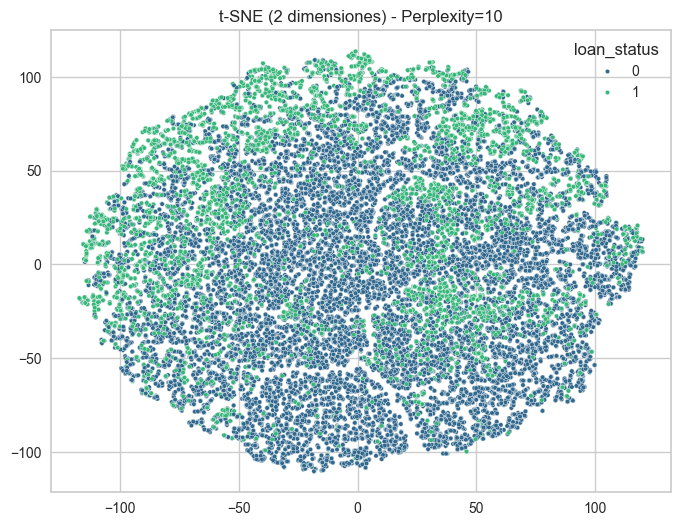

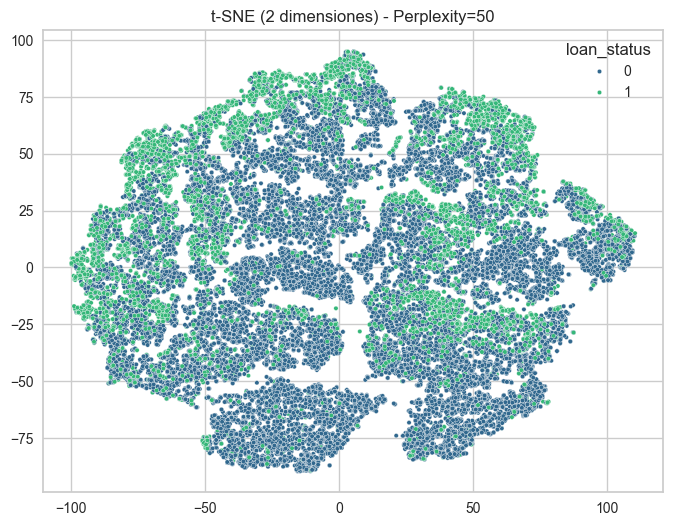

In [103]:
#3. Entrenamos un modelo de t-SNE sobre X que proyecte a 2 dimensiones.
#a. Probamos por lo menos dos valores de perplexity.

# t-SNE con perplexity=10
X_tsne_10 = TSNE(n_components=2, perplexity=10).fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_tsne_10[:, 0], y=X_tsne_10[:, 1], hue=y1, palette="viridis", s=10)
plt.title("t-SNE (2 dimensiones) - Perplexity=10")
plt.show()

# t-SNE con perplexity=50
X_tsne_50 = TSNE(n_components=2, perplexity=50).fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_tsne_50[:, 0], y=X_tsne_50[:, 1], hue=y1, palette="viridis", s=10)
plt.title("t-SNE (2 dimensiones) - Perplexity=50")
plt.show()

b. Interpretamos los resultados

- Perplexity = 10
La visualización muestra un agrupamiento algo circular y denso, sin bordes definidos.
No hay una separación clara entre las clases (loan_status 0 y 1). Ambas clases están mezcladas en todo el espacio.
Esto puede indicar que con esta perplexity, el modelo capturó muy bien las relaciones locales, pero no logró diferenciar globalmente las clases.

- Perplexity = 50
El mapa tiene más forma y dispersión, con ciertos subgrupos y estructuras internas.
Aunque sigue habiendo mezcla entre las clases, comienzan a visualizarse algunas zonas con predominancia de una clase sobre otra.
Esto sugiere que el modelo captura mejor las relaciones globales entre los puntos al usar una perplexity más alta.

c. Comparamos lo obtenido con KMeans.
i. ¿Es muy distinto? Si, lo obtenido con t-SNE no es equivalente a lo obtenido con KMeans, porque ambos algoritmos resuelven problemas distintos. 
ii. ¿Por qué podría dar distinto? t-SNE ayuda a visualizar relaciones locales, mientras que KMeans asigna pertenencia a grupos en función de la **distancia euclidiana**.
Por lo tanto, t-SNE puede mostrar agrupamientos que no coinciden con los clusters lineales detectados por KMeans.

# Aprendizaje Supervisado

## Clasificacion


*   Determinar la métrica performance adecuada para la predicción de loan_status.

Al tratar con prestamos hay que tener mucho cuidado con los falsos positivos, es por esta razon que nosotros elegimos a la precicion como metrica

In [104]:
# 1. Eliminar columnas que no usamos
drop_cols = ["person_gender", "loan_amnt", "person_income"]
data_model = data.drop(columns=drop_cols, errors="ignore").copy()

# 2. One-hot encoding de categóricas
data_encoded = pd.get_dummies(
    data_model,
    columns=["person_education", "person_home_ownership", "loan_intent", "previous_loan_defaults_on_file"],
    drop_first=True
)

# 3. Definir X e y
X = data_encoded.drop(columns=["loan_status"])
y = data_encoded["loan_status"]

print("Columnas finales:", X.columns.tolist())
print("Shape:", X.shape)

Columnas finales: ['person_age', 'person_emp_exp', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score', 'cluster', 'person_education_Bachelor', 'person_education_Doctorate', 'person_education_High School', 'person_education_Master', 'person_home_ownership_OTHER', 'person_home_ownership_OWN', 'person_home_ownership_RENT', 'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT', 'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE', 'previous_loan_defaults_on_file_Yes']
Shape: (37523, 20)


Separamos en train/test split y normalizamos las columnas numericas escalandolas con un scaler

In [105]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Train/Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2
)

# 2. Columnas numéricas a escalar
num_cols = ["person_age", "person_emp_exp", "loan_int_rate",
            "loan_percent_income", "cb_person_cred_hist_length", "credit_score"]

X_train[num_cols] = X_train[num_cols].astype(float)
X_test[num_cols] = X_test[num_cols].astype(float)

scaler = StandardScaler()
X_train.loc[:, num_cols] = scaler.fit_transform(X_train[num_cols])
X_test.loc[:, num_cols] = scaler.transform(X_test[num_cols])

print("X_train:", X_train.shape, "X_test:", X_test.shape)

X_train: (30018, 20) X_test: (7505, 20)


## Regresion Logistica

=== Logistic Regression ===
Mejores hiperparámetros: {'C': 0.1, 'penalty': 'l2'}
Mejor precision (CV): 0.7553530402108857
Precision en test: 0.7526612398246713

Classification Report:
               precision    recall  f1-score   support

           0     0.9257    0.9326    0.9292      5864
           1     0.7527    0.7325    0.7424      1641

    accuracy                         0.8889      7505
   macro avg     0.8392    0.8326    0.8358      7505
weighted avg     0.8879    0.8889    0.8883      7505


Top variables más influyentes:
                               feature      coef  abs_coef
19  previous_loan_defaults_on_file_Yes -5.479304  5.479304
18                 loan_intent_VENTURE -1.040094  1.040094
2                        loan_int_rate  0.869718  0.869718
13          person_home_ownership_RENT  0.861231  0.861231
12           person_home_ownership_OWN -0.859324  0.859324
3                  loan_percent_income  0.836962  0.836962
14               loan_intent_EDUCATION -0.7

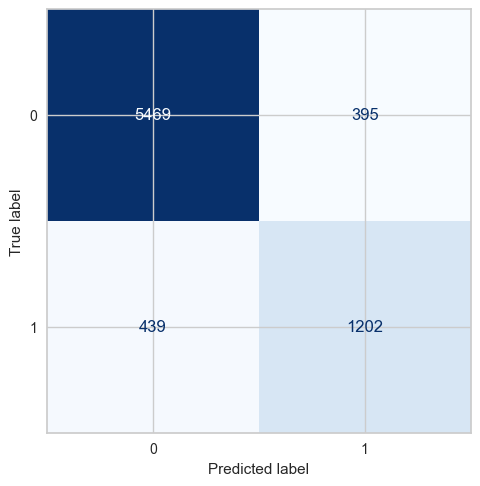

In [106]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import precision_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

# 1. Modelo base
log_reg = LogisticRegression(max_iter=2000, solver="liblinear")

# 2. Hiperparámetros
param_log = {
    "penalty": ["l1", "l2"],
    "C": [0.1, 1.0, 10.0]
}

# 3. CV
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_log = GridSearchCV(
    log_reg, param_log,
    scoring="precision",
    cv=cv,
    refit=True,
    n_jobs=-1
)

# 4. Entrenar
grid_log.fit(X_train, y_train)
y_pred_log = grid_log.predict(X_test)

# 5. Resultados
print("=== Logistic Regression ===")
print("Mejores hiperparámetros:", grid_log.best_params_)
print("Mejor precision (CV):", grid_log.best_score_)
print("Precision en test:", precision_score(y_test, y_pred_log))
ConfusionMatrixDisplay.from_estimator(grid_log, X_test, y_test, colorbar=False, cmap='Blues')
print("\nClassification Report:\n", classification_report(y_test, y_pred_log, digits=4))

# 6. Coeficientes
coefs = grid_log.best_estimator_.coef_.ravel()
coef_df = pd.DataFrame({"feature": X_train.columns, "coef": coefs, "abs_coef": np.abs(coefs)})
print("\nTop variables más influyentes:")
print(coef_df.sort_values("abs_coef", ascending=False).head(10))

## Arbol de desicion

=== Decision Tree ===
Mejores hiperparámetros: {'ccp_alpha': 0.0, 'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 20}
Mejor precision (CV): 0.8420414873121775
Precision en test: 0.8446455505279035

Classification Report:
               precision    recall  f1-score   support

           0     0.9157    0.9649    0.9396      5864
           1     0.8446    0.6825    0.7550      1641

    accuracy                         0.9031      7505
   macro avg     0.8802    0.8237    0.8473      7505
weighted avg     0.9001    0.9031    0.8993      7505


Top variables más influyentes (árbol):
                               feature  importance
19  previous_loan_defaults_on_file_Yes    0.571443
2                        loan_int_rate    0.152746
3                  loan_percent_income    0.144872
13          person_home_ownership_RENT    0.060526
5                         credit_score    0.025511
18                 loan_intent_VENTURE    0.012565
15         loan_intent_HOMEIMPROVEMENT   

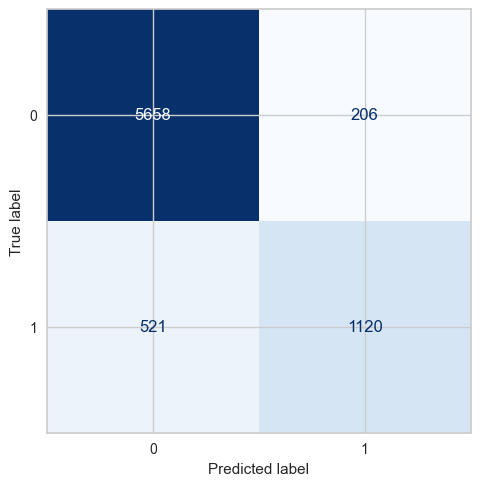

In [107]:
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
# 1. Definir modelo base
tree_clf = DecisionTreeClassifier(random_state=42)

# 2. Hiperparámetros a probar
param_tree = {
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 5, 10, 15],
    "min_samples_leaf": [1, 5, 10, 20],
    "ccp_alpha": [0.0, 0.001, 0.01]
}

# 3. CV
grid_tree = GridSearchCV(
    tree_clf, param_tree,
    scoring="precision",
    cv=cv,
    n_jobs=-1
)

# 4. Entrenar
grid_tree.fit(X_train, y_train)
y_pred_tree = grid_tree.predict(X_test)

# 5. Resultados
print("=== Decision Tree ===")
print("Mejores hiperparámetros:", grid_tree.best_params_)
print("Mejor precision (CV):", grid_tree.best_score_)
print("Precision en test:", precision_score(y_test, y_pred_tree))
ConfusionMatrixDisplay.from_estimator(grid_tree, X_test, y_test, colorbar=False, cmap='Blues')
print("\nClassification Report:\n", classification_report(y_test, y_pred_tree, digits=4))

# 6. Feature importances
tree_est = grid_tree.best_estimator_
imp = pd.DataFrame({
    "feature": X_train.columns,
    "importance": tree_est.feature_importances_
}).sort_values("importance", ascending=False)

print("\nTop variables más influyentes (árbol):")
print(imp.head(10))

# 7. Ejemplo de reglas
print("\nEjemplo de reglas (profundidad 3):")
print(export_text(tree_est, feature_names=list(X_train.columns), max_depth=3))


## Random Forest

=== Random Forest ===
Mejores hiperparámetros: {'max_features': 'sqrt', 'n_estimators': 100}
Mejor precision (CV): 0.8864302734756666
Precision en test: 0.8905472636815921

Matriz de confusión:
 [[5732  132]
 [ 567 1074]]

Classification Report:
               precision    recall  f1-score   support

           0     0.9100    0.9775    0.9425      5864
           1     0.8905    0.6545    0.7545      1641

    accuracy                         0.9069      7505
   macro avg     0.9003    0.8160    0.8485      7505
weighted avg     0.9057    0.9069    0.9014      7505


Top variables con más peso (Random Forest):
                               feature  importance
19  previous_loan_defaults_on_file_Yes    0.507083
3                  loan_percent_income    0.196662
2                        loan_int_rate    0.152162
13          person_home_ownership_RENT    0.068135
5                         credit_score    0.018867
18                 loan_intent_VENTURE    0.010836
12           person_home

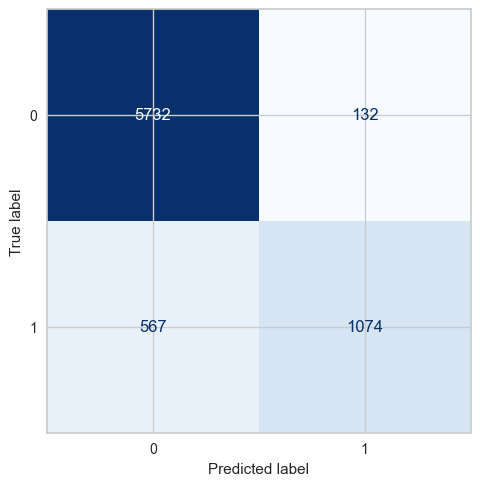

In [108]:
from sklearn.ensemble import RandomForestClassifier

# 1. Definir modelo base (usando parámetros del árbol encontrado)
best_tree_params = grid_tree.best_params_

rf_clf = RandomForestClassifier(
    random_state=42,
    criterion=best_tree_params["criterion"],
    max_depth=best_tree_params["max_depth"],
    min_samples_leaf=best_tree_params["min_samples_leaf"],
    ccp_alpha=best_tree_params["ccp_alpha"]
)

# 2. Hiperparámetros a probar (n_estimators y max_features)
param_rf = {
    "n_estimators": [100, 200, 300],
    "max_features": ["sqrt", "log2", None]
}

# 3. CV
grid_rf = GridSearchCV(
    estimator=rf_clf, 
    param_grid=param_rf,
    scoring="precision",
    cv=cv,
    n_jobs=-1
)

# 4. Entrenar
grid_rf.fit(X_train, y_train)
y_pred_rf = grid_rf.predict(X_test)

# 5. Resultados
print("=== Random Forest ===")
print("Mejores hiperparámetros:", grid_rf.best_params_)
print("Mejor precision (CV):", grid_rf.best_score_)
print("Precision en test:", precision_score(y_test, y_pred_rf))
print("\nMatriz de confusión:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf, digits=4))

ConfusionMatrixDisplay.from_estimator(grid_rf, X_test, y_test, colorbar=False, cmap='Blues')

# 6. Feature importances
rf_est = grid_rf.best_estimator_
imp_rf = pd.DataFrame({
    "feature": X_train.columns,
    "importance": rf_est.feature_importances_
}).sort_values("importance", ascending=False)

print("\nTop variables con más peso (Random Forest):")
print(imp_rf.head(10))

Como podemos ver se observa una mejora considerable de Arbol a Random Forest. Es razonable debido a que Random forest al combinar muchos árboles, reduce el sobreajuste y captura relaciones más complejas.

# Regresión


1) Determinar la métrica performance adecuada para la predicción de credit_score.

La métrica de performance elegida es RMSE (Error Cuadrático Medio Raíz), dado que penaliza con mayor fuerza los desvíos grandes, aspecto de suma importancia en el ámbito de préstamos bancarios. Además, luego de la etapa de preprocesamiento verificamos que la variable credit_score ya no presenta outliers significativos, los cuales en caso de existir podrían dominar esta métrica y distorsionar la evaluación.

2. Determinar las variables que se consideren relevantes y descartar las que no.

In [109]:
num_cols = data.select_dtypes(include=['int64', 'float64']).columns

corr = data[num_cols].corr()

print(corr['credit_score'].sort_values(ascending=False))


credit_score                  1.000000
person_emp_exp                0.138874
person_age                    0.126121
cb_person_cred_hist_length    0.109782
person_income                 0.012634
loan_int_rate                 0.009163
loan_amnt                     0.004580
loan_percent_income          -0.006127
loan_status                  -0.009336
Name: credit_score, dtype: float64


descartamos loan_percent_income(tiene correlacion negativa)

In [110]:
X = data.drop(columns=['loan_status', 'credit_score', 'loan_percent_income'])
y2 = data['credit_score']

3) Dividir el set de datos en train, test.

In [111]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y2,
    test_size=0.3,   # 30% para test
    random_state=42
)

4) Entrenar un modelo de regresión lineal.

Linear Regression CV RMSE (5 folds):
Mean RMSE: 44.98503849279043
Std RMSE: 0.3618739572439603
Test RMSE: 45.099
Test R²: 0.089


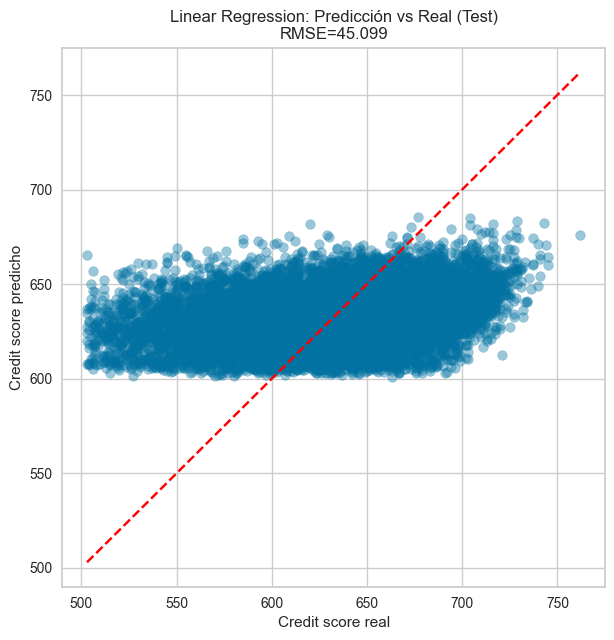


Top 10 features por magnitud de coeficiente:
                               feature       coef   abs_coef
8           person_education_Doctorate  29.582251  29.582251
10             person_education_Master  17.522715  17.522715
19  previous_loan_defaults_on_file_Yes -15.827622  15.827622
7            person_education_Bachelor   9.732374   9.732374
9         person_education_High School  -9.493375   9.493375
11         person_home_ownership_OTHER  -6.488104   6.488104
2                       person_emp_exp   6.255401   6.255401
18                 loan_intent_VENTURE   4.035218   4.035218
14               loan_intent_EDUCATION   3.766080   3.766080
17                loan_intent_PERSONAL   2.557567   2.557567


In [112]:
# Identificar columnas numéricas y categóricas
num_cols = X.select_dtypes(include=['int64','float64']).columns
cat_cols = X.select_dtypes(include=['object']).columns

# Preprocesamiento: escalado + one-hot
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(drop='first'), cat_cols)  
    ]
)

# Pipeline regresión lineal
lin_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# K-Fold Cross Validation (5 folds)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
neg_mse_scores = cross_val_score(lin_pipeline, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-neg_mse_scores)
print("Linear Regression CV RMSE (5 folds):")
print("Mean RMSE:", rmse_scores.mean())
print("Std RMSE:", rmse_scores.std())

# Entrenar modelo completo sobre train
lin_pipeline.fit(X_train, y_train)

# Evaluación sobre test
y_pred = lin_pipeline.predict(X_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
r2_test = r2_score(y_test, y_pred)
print(f"Test RMSE: {rmse_test:.3f}")
print(f"Test R²: {r2_test:.3f}")

# Grafico predicción vs target
plt.figure(figsize=(7,7))
plt.scatter(y_test, y_pred, alpha=0.4)
minv = min(y_test.min(), y_pred.min())
maxv = max(y_test.max(), y_pred.max())
plt.plot([minv, maxv], [minv, maxv], linestyle='--', color='red')
plt.xlabel("Credit score real")
plt.ylabel("Credit score predicho")
plt.title(f"Linear Regression: Predicción vs Real (Test)\nRMSE={rmse_test:.3f}")
plt.grid(True)
plt.show()

# Interpretacion de coeficientes
preprocessor.fit(X_train)  # necesario para obtener nombres de dummies
num_features = num_cols.tolist()
cat_features = []
if len(cat_cols) > 0:
    ohe = preprocessor.named_transformers_['cat']  
    cat_features = list(ohe.get_feature_names_out(cat_cols))

feature_names = num_features + cat_features
coef = lin_pipeline.named_steps['regressor'].coef_
coef_df = pd.DataFrame({'feature': feature_names, 'coef': coef})
coef_df['abs_coef'] = coef_df['coef'].abs()
coef_df = coef_df.sort_values(by='abs_coef', ascending=False)

print("\nTop 10 features por magnitud de coeficiente:")
print(coef_df.head(10))

El RMSE indica que, en promedio, las predicciones del modelo se desvían 45 puntos del credit score real. El R² muy bajo (0.089) muestra que el modelo lineal explica solo 9% de la variabilidad de la variable objetivo. Esto significa que, aunque hay cierta relación con algunas variables, la mayoría de la variabilidad del credit score no se captura con un modelo lineal simple.

Las variables educación y antecedentes de impagos son las que más influyen en la predicción del credit score.

5) Entrenar un modelo de KNN.

Analizamos si normalizar

In [113]:
print(X[num_cols].describe())

         person_age  person_income  person_emp_exp     loan_amnt  \
count  37523.000000   37523.000000    37523.000000  37523.000000   
mean      26.617141   69642.594302        4.282387   8427.344882   
std        4.111499   31618.302325        4.138628   4873.368682   
min       20.000000    8000.000000        0.000000    500.000000   
25%       23.000000   45616.000000        1.000000   4889.500000   
50%       26.000000   64109.000000        3.000000   7500.000000   
75%       29.000000   87819.500000        7.000000  12000.000000   
max       39.000000  168633.000000       18.000000  23000.000000   

       loan_int_rate  cb_person_cred_hist_length  
count   37523.000000                37523.000000  
mean       10.917369                    5.173867  
std         2.953352                    2.898978  
min         5.420000                    2.000000  
25%         8.490000                    3.000000  
50%        11.010000                    4.000000  
75%        12.980000          

Metricas elegidas: Minkowski y Manhattan

In [114]:
preprocessor_knn = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(drop='first'), cat_cols)
    ]
)

# Métricas a probar
metrics = ['minkowski', 'manhattan']

Hallar K adecuados

In [115]:
from sklearn.model_selection import cross_val_score, KFold
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor

k_values = range(1, 21)
results = {}  # Guardaremos RMSE promedio por métrica

for metric in metrics:
    rmse_list = []
    for k in k_values:
        knn_pipeline = Pipeline([
            ('preprocessor', preprocessor_knn),
            ('knn', KNeighborsRegressor(n_neighbors=k, metric=metric))
        ])
        # K-Fold cross validation
        kf = KFold(n_splits=5, shuffle=True, random_state=42)
        scores = cross_val_score(knn_pipeline, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
        rmse_scores = np.sqrt(-scores)
        rmse_list.append(rmse_scores.mean())
    results[metric] = rmse_list

# Identificar automáticamente el k óptimo para cada métrica
best_k = {metric: k_values[np.argmin(results[metric])] for metric in metrics}
print("Mejor k por métrica (RMSE mínimo):", best_k)

Mejor k por métrica (RMSE mínimo): {'minkowski': 20, 'manhattan': 20}


Evaluar desempeño y gráfico predicción vs target


KNN (minkowski) con k=20:
Test RMSE: 46.346
Test R²: 0.038


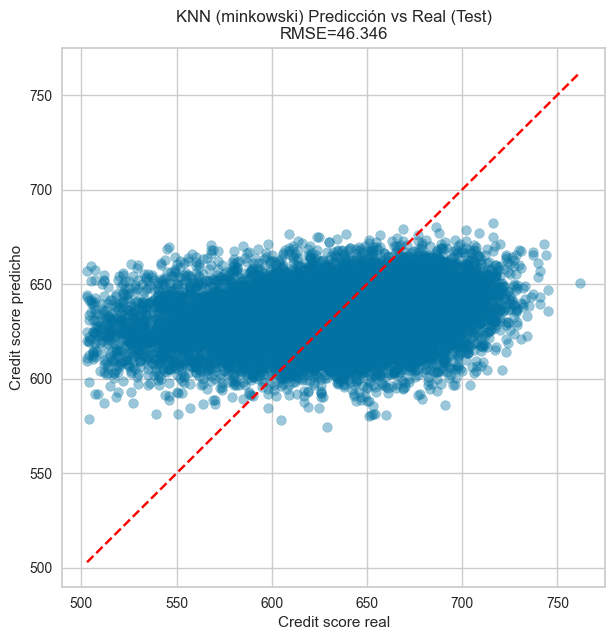


KNN (manhattan) con k=20:
Test RMSE: 46.258
Test R²: 0.041


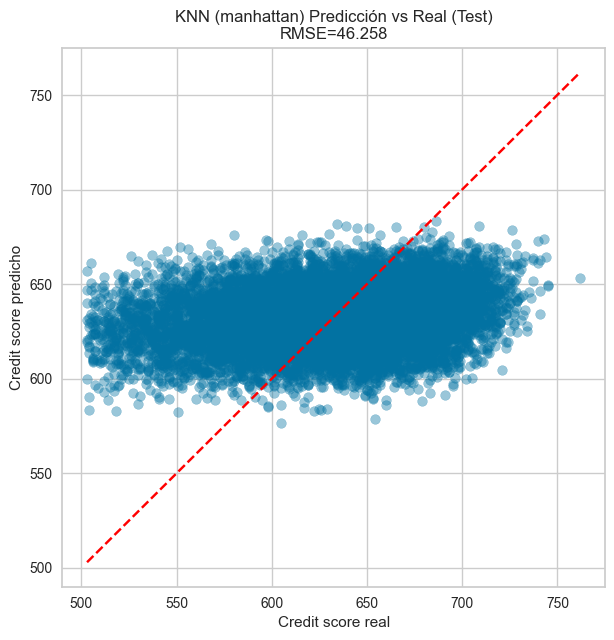

In [116]:
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

for metric in metrics:
    k_opt = best_k[metric]
    knn_pipeline = Pipeline([
        ('preprocessor', preprocessor_knn),
        ('knn', KNeighborsRegressor(n_neighbors=k_opt, metric=metric))
    ])
    # Entrenar modelo completo sobre train
    knn_pipeline.fit(X_train, y_train)
    
    # Predicción sobre test
    y_pred = knn_pipeline.predict(X_test)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
    r2_test = r2_score(y_test, y_pred)
    
    print(f"\nKNN ({metric}) con k={k_opt}:")
    print(f"Test RMSE: {rmse_test:.3f}")
    print(f"Test R²: {r2_test:.3f}")
    
    # Gráfico predicción vs target
    plt.figure(figsize=(7,7))
    plt.scatter(y_test, y_pred, alpha=0.4)
    minv = min(y_test.min(), y_pred.min())
    maxv = max(y_test.max(), y_pred.max())
    plt.plot([minv, maxv], [minv, maxv], linestyle='--', color='red')
    plt.xlabel("Credit score real")
    plt.ylabel("Credit score predicho")
    plt.title(f"KNN ({metric}) Predicción vs Real (Test)\nRMSE={rmse_test:.3f}")
    plt.grid(True)
    plt.show()

Gráfico RMSE vs k

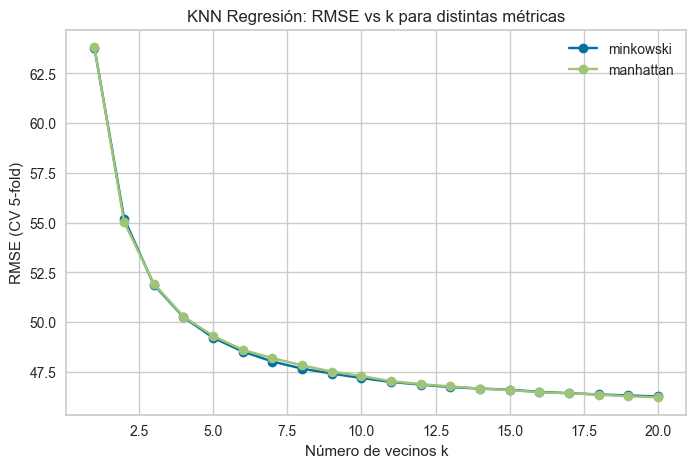

In [117]:
plt.figure(figsize=(8,5))
for metric in metrics:
    plt.plot(k_values, results[metric], marker='o', label=metric)
plt.xlabel("Número de vecinos k")
plt.ylabel("RMSE (CV 5-fold)")
plt.title("KNN Regresión: RMSE vs k para distintas métricas")
plt.legend()
plt.grid(True)
plt.show()

En el gráfico RMSE vs k se observa que para k=1 el error es alto (62,5), luego disminuye rápidamente al aumentar k, reflejando que el modelo se beneficia al promediar más vecinos y suavizar el ruido. Posteriormente, la reducción de RMSE se vuelve más lenta, indicando que el modelo comienza a sobre-suavizar. Ambas métricas ('minkowski' y 'manhattan') se comportan de manera muy similar, lo que muestra que la elección de la métrica no tiene gran impacto en este dataset.

6) Entrenar otro modelo a elección.

El elegido es Random Forest

No se normaliza ya que este modelo no depende de distancias sino umbrales.

In [118]:
preprocessor_rf = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', num_cols),  # no escalamos
        ('cat', OneHotEncoder(drop='first'), cat_cols)
    ]
)

Hiperparámetro y K-fold cross validation

In [119]:
# Pipeline con Random Forest
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor_rf),
    ('rf', RandomForestRegressor(random_state=42))
])

# Hiperparámetros a probar
param_grid = {
    'rf__n_estimators': [50, 100, 200],
    'rf__max_depth': [None, 10, 20]
}

kf = KFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(rf_pipeline, param_grid, cv=kf, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Mejor hiperparámetro:", grid_search.best_params_)

/Users/neix/Documents/afelizzola/UCEMA/Topicos Avanzados de la IA/tp1-parte2/.venv/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Mejor hiperparámetro: {'rf__max_depth': 10, 'rf__n_estimators': 200}


Evaluar desempeño

Random Forest Test RMSE: 45.297
Random Forest Test R²: 0.081


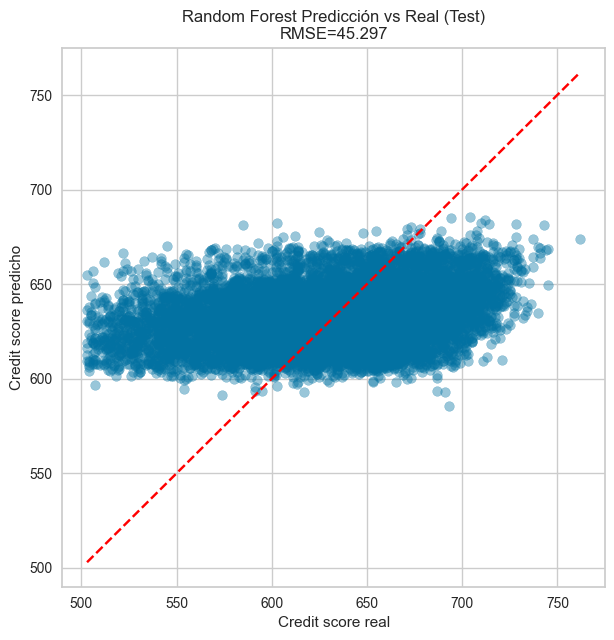

In [120]:
# Entrenar con los mejores parámetros sobre train completo
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
r2_test = r2_score(y_test, y_pred)

print(f"Random Forest Test RMSE: {rmse_test:.3f}")
print(f"Random Forest Test R²: {r2_test:.3f}")

# Gráfico predicción vs target
plt.figure(figsize=(7,7))
plt.scatter(y_test, y_pred, alpha=0.4)
minv = min(y_test.min(), y_pred.min())
maxv = max(y_test.max(), y_pred.max())
plt.plot([minv, maxv], [minv, maxv], linestyle='--', color='red')
plt.xlabel("Credit score real")
plt.ylabel("Credit score predicho")
plt.title(f"Random Forest Predicción vs Real (Test)\nRMSE={rmse_test:.3f}")
plt.grid(True)
plt.show()

# Conclusiones

1. Durante el análisis de ls tareas de clustering y reducción de dimensiones observamos que los datos presentan cierta tendencia a agruparse (Hopkins = 0.83), aunque los clusters obtenidos con KMeans no son muy definidos. Con PCA comprobamos que pocas componentes concentran más del 95% de la varianza, lo que indica redundancia entre variables. Finalmente, con t-SNE se identificaron subgrupos dentro de los datos, pero las clases de loan_status aparecieron mezcladas, lo que indica que no existe una frontera clara y lineal que separe bien ambas clases.

2. Para la prediccion de loan_status podemos decir que el Random Forest fue el mejor con amplia diferencia, es el que mayor precision tiene , a su vez tiene el minimo valor de falsos positivos, que es el caso en el cual el prestamo se aprueba cuando no deberia, es el caso mas costoso si nos equivocamos.

3. Ninguno de los modelos de regresión entrenados logra predecir de manera efectiva el credit_score. Todos entregan RMSE = 45 y R² < 0.1. Las diferencias son mínimas y no se puede decir que uno sea claramente “mejor” en términos prácticos.